In [20]:
# Import dependacies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
# Load files
# Keep files seperate for train adn test
file_dir1 = "C:\\Users\\Connor\\Desktop\\Task 46\\mnist_set\\mnist_train.csv"
file_dir2 = "C:\\Users\\Connor\\Desktop\\Task 46\\mnist_set\\mnist_test.csv"

df_train  = pd.read_csv(file_dir1)
df_test = pd.read_csv(file_dir2)

# Locate images and labels for each variable
train_images = df_train.iloc[:, 1:].values
train_labels = df_train.iloc[:, 0].values

test_images = df_test.iloc[:, 1:].values
test_labels = df_test.iloc[:, 0].values


In [3]:
# Dimensions of the data 
# Images are 2D and labels 1D
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


The provided data sets consist of 60,000 training samples and 10,000 testing samples, each represented in a 2-dimensional format with 784 features. These data sets are well suited for machine learning purposes and do not require any modifications.

In [4]:
# Print data types out
print("Data Type: ", train_images.dtype)
print("Data Type: ", train_labels.dtype)
print("Data Type: ", test_images.dtype)
print("Data Type: ", test_labels.dtype)

Data Type:  int64
Data Type:  int64
Data Type:  int64
Data Type:  int64


In [5]:
# Create new variables for X & y train 
X = train_images
y = train_labels

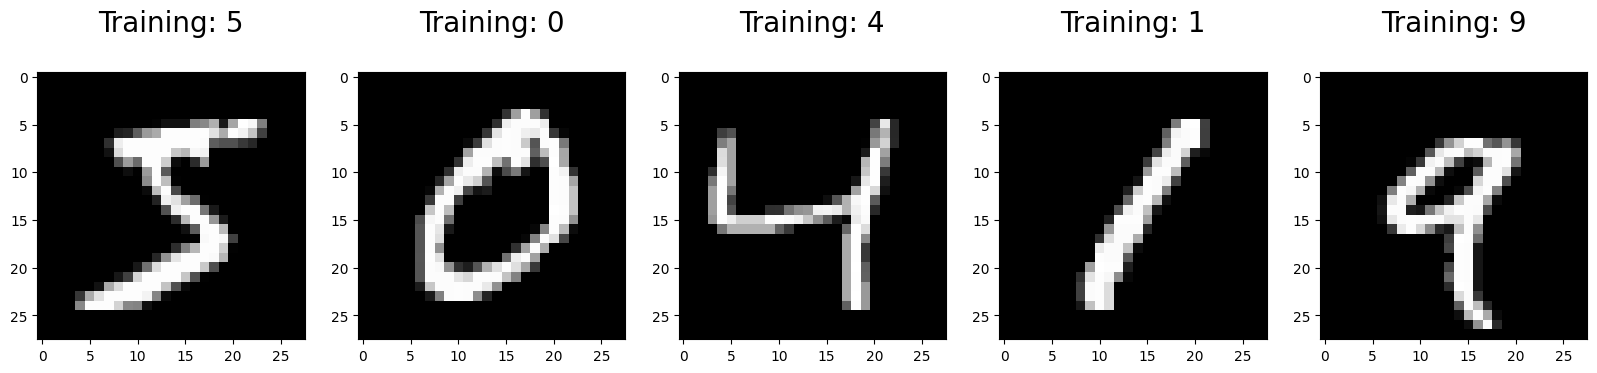

In [6]:
# Preview images
plt.figure(figsize=(20,4))
# For loop of image and label 
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Split Data

In [7]:
# Split the data into test and train parts. 80 train 20 test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


# Preview images in training set

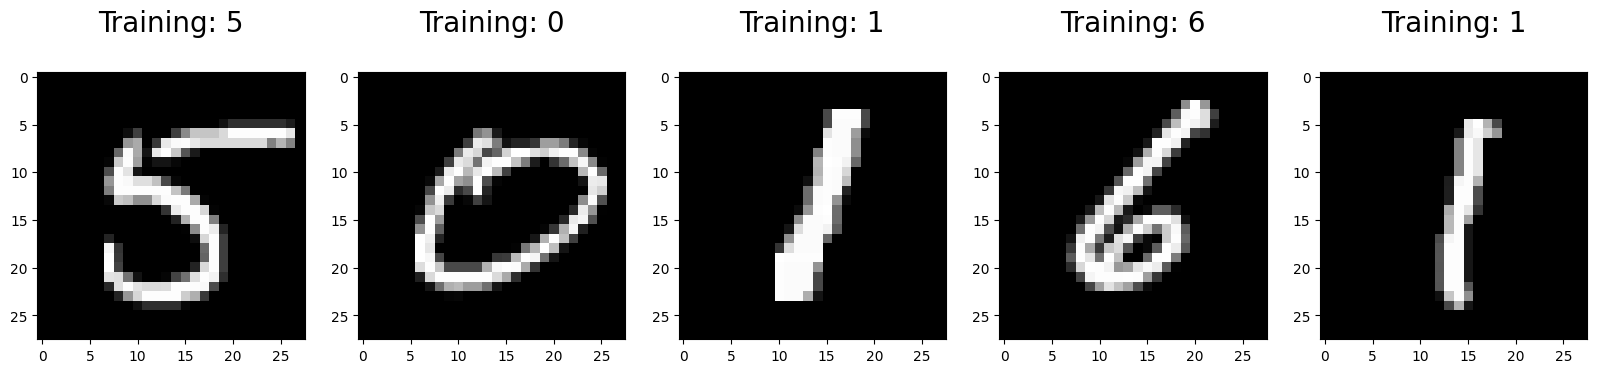

In [10]:
# Preview images
plt.figure(figsize=(20,4))
# For loop of image and label 
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

With the goal of accurately evaluating the model's performance, it's important to split the data into separate training and testing sets. This will enable the model to make predictions on new, unseen data that it has not been trained on.


The random forest algorithm will be used in this task as it offers the advantage of both regression and classification capabilities, while also delivering reliable results. This machine learning approach is known for its ability to generate high-accuracy predictions.

# Random Forrest Analysis

In [11]:
# Random forrest showing top 5 
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
print("Accuracy Score of test set:",forest.score(X_test, y_test))

Accuracy Score of test set: 0.9676666666666667


While the random forest algorithm has demonstrated impressive accuracy in the current setup, there is still room for improvement. To enhance its performance further, we will conduct a series of experiments to explore different tuning methods and identify the optimal approach for this specific data set. With careful tuning, we hope to achieve an even higher level of accuracy and unlock the full potential of the random forest algorithm.

# n_estimator

Amount of trees: 10
Accuracy score 0.9395
 
Amount of trees: 30
Accuracy score 0.9611666666666666
 
Amount of trees: 50
Accuracy score 0.9646666666666667
 
Amount of trees: 70
Accuracy score 0.9665833333333333
 
Amount of trees: 90
Accuracy score 0.967
 
Amount of trees: 100
Accuracy score 0.9676666666666667
 


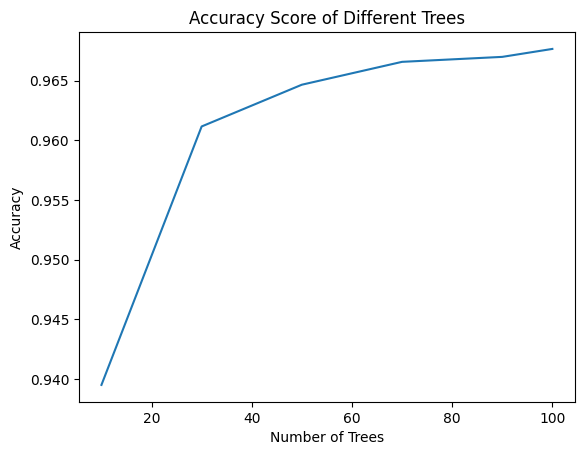

In [26]:
# Lists
results = []
n_est_options = [10, 30, 50, 70, 90, 100,]

# Loop over amount of trees
for i in n_est_options:
    # Which model we want, using n_jobs to speed up training
    model = RandomForestClassifier(i, n_jobs=1,random_state=0)
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    results.append(accuracy)
    print("Amount of trees:", i)
    print("Accuracy score", accuracy)
    print(" ")
    
# Plot line chart showing comparison    
plt.plot(n_est_options, results)
plt.title("Accuracy Score of Different Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

Increasing the number of trees in the random forest results in a slight improvement in accuracy. Although the percentage increase is small, every little gain can make a significant difference in the overall performance of the model. By fine-tuning the number of trees, we can continue to optimize the accuracy of the algorithm and achieve even better results.

# Max Depth

Max Depth: 3
Accuracy score 0.7619166666666667
 
Max Depth: 10
Accuracy score 0.9466666666666667
 
Max Depth: 42
Accuracy score 0.9676666666666667
 


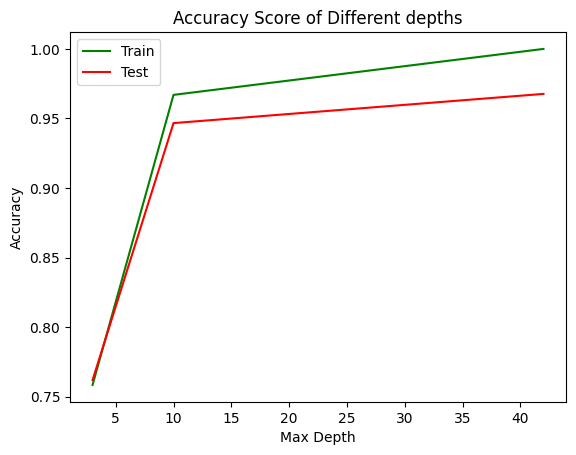

In [14]:
max_depths = [3, 10, 42]
train_results = []
test_results = []
# Loop over max depths
for depth in max_depths:
    # Which model we want
    m_rf = RandomForestClassifier(max_depth=depth, n_jobs=1)
    m_rf.fit(X_train,y_train)
    # Obtain score for train and test set and append to lists
    accuracy_tr = m_rf.score(X_train, y_train)
    train_results.append(accuracy_tr)
    accuracy_te = m_rf.score(X_test,y_test)
    test_results.append(accuracy_te)
    print("Max Depth:", depth)
    print("Accuracy score", accuracy_te)
    print(" ")

plt.plot(max_depths, train_results, 'g', label='Train')
plt.plot(max_depths, test_results, 'r', label='Test')
plt.title("Accuracy Score of Different depths")
plt.legend() 
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

The results show that increasing the maximum depth of trees in the random forest greatly improves accuracy, as seen in the improved train and test performance. Optimal results are achieved with a maximum depth greater than 10.

# Min Samples Leaf

Minium Samples: 2
Accuracy score 0.9658333333333333
 
Minium Samples: 3
Accuracy score 0.96475
 
Minium Samples: 5
Accuracy score 0.9613333333333334
 
Minium Samples: 7
Accuracy score 0.9581666666666667
 
Minium Samples: 9
Accuracy score 0.9561666666666667
 
Minium Samples: 11
Accuracy score 0.9543333333333334
 


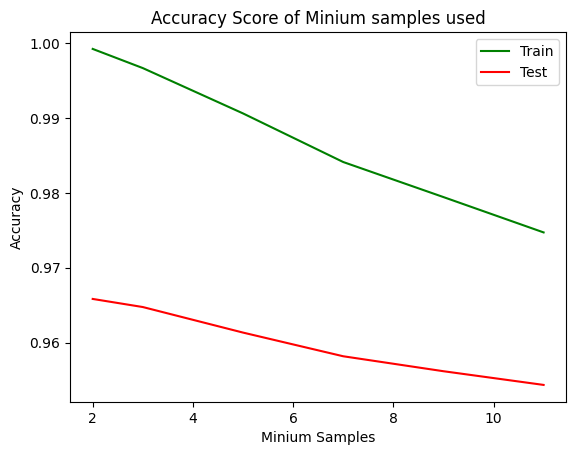

In [15]:
min_samples = [2, 3, 5, 7, 9, 11]
train_results = []
test_results = []
# Loop over max depths
for n in min_samples:
    # Which model we want
    min_s = RandomForestClassifier(n_estimators= 100, oob_score=True, 
                                   random_state=0, min_samples_leaf=n)
    min_s.fit(X_train,y_train)
    # Obtain score for train and test set and append to lists
    accuracy_tr = min_s.score(X_train, y_train)
    train_results.append(accuracy_tr)
    accuracy_te = min_s.score(X_test,y_test)
    test_results.append(accuracy_te)
    print("Minium Samples:", n)
    print("Accuracy score", accuracy_te)
    print(" ")

plt.plot(min_samples, train_results, 'g', label='Train')
plt.plot(min_samples, test_results, 'r', label='Test')
plt.title("Accuracy Score of Minium samples used")
plt.legend() 
plt.xlabel("Minium Samples")
plt.ylabel("Accuracy")
plt.show()



The graph shows that accuracy decreases as the number of samples per tree increases, indicating the need for optimization.

After evaluating various features, it has been determined that the n_estimator feature provides the greatest return in terms of accuracy. Therefore, this feature will be focused on for future tuning efforts.

# Random Forrest Model

In [16]:
# Random forrest with tested n_estimator 
forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy Score of test set:",forest.score(X_test, y_test))

Accuracy Score of test set: 0.9676666666666667


The high accuracy score is great to see and gives confidence is the findings. Based on our findings, the optimal number of estimators was determined to be 100, which will be used in further evaluations.

# Confusion Matrix

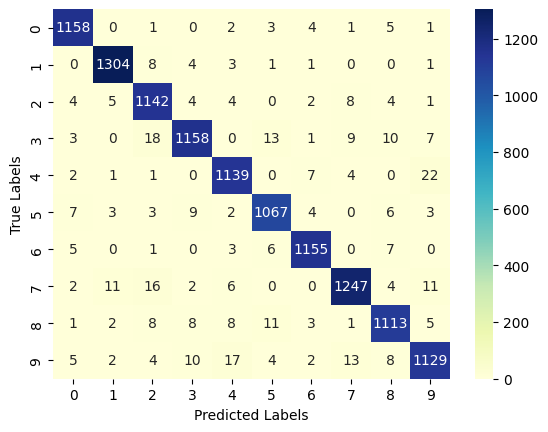

In [22]:
# prediction set
pred = model.predict(X_test)
# Compare X to y
conf_mat = confusion_matrix(y_test, pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

While the model demonstrated strong performance overall, it did exhibit some difficulties with accurately classifying certain numbers. In particular, the numbers 4 and 3 were often misclassified as 9. Nevertheless, the low ratio of incorrect predictions compared to correct ones demonstrates the overall effectiveness of the model. These results are encouraging and provide a solid foundation for continued improvement and optimization.

# Classification Report

In [25]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1175
           1       1.00      1.00      1.00      1322
           2       1.00      1.00      1.00      1174
           3       1.00      1.00      1.00      1219
           4       1.00      1.00      1.00      1176
           5       1.00      1.00      1.00      1104
           6       1.00      1.00      1.00      1177
           7       1.00      1.00      1.00      1299
           8       1.00      1.00      1.00      1160
           9       1.00      1.00      1.00      1194

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



The model has been trained and tested on a dataset with 10 different classes (0-9) and has achieved an overall accuracy of 92%.

The precision, recall, and f1-score are evaluation metrics that provide insight into the performance of the model on each class. The precision measures the proportion of correct positive predictions, recall measures the proportion of actual positive cases that were correctly identified, and f1-score is the harmonic mean of precision and recall.

In this case, the model performed well with precision and recall scores ranging from 0.88 to 0.97. The weighted average f1-score of 0.92 indicates that the model is able to balance precision and recall well. The macro average f1-score of 0.92 also indicates that the model has a similar performance across all classes.